# Cheat sheet
1. Category : telle ou telle feature selon les catégories
1. Univariate : la fonction de répartition de x
1. Bivariate : y en fonction de x
1. Multivariate : on rajoute teinte, couleur, taille 
1. Matrix : heatmap

### [Categorical plots](#categorical-plots)
  * To visualize data vs discrete and distinct categories or groups
  * Bar plot, Count plot, Swarm plot, Point plot, Categorical Box plot, Categorical Violin plot, **Cat plot**, Categorical Swarm plot, etc.
### [Univariate plots](#univariate-plots) 
  * Visualize a single variable.
  * Histogram, KDE plot, Rug plot, Box plot, Dist plot, Violin plot, Strip plot, etc.
### [Bivariate plots](#bivariate-plots) 
  * Visualize the relationship between 2 variables.
  * Scatter plot, Line plot, Regression plot, Join plot, Hexbin plot, etc.
### [Multivariate plots](#multivariate-plots)
  * Involve more than two variables.
  * Pair plot, Facet Grid, Relational plot.
### [Matrix plots](#matrix-plots)
  * Visualize relationships within matrices
  * Heatmap, Cluster Map.


### Une autre façon d'organiser les graphes :

![classes.png](classes.png)


### Culture 
  * sns stands for Samuel Norman Seaborn du show “The West Wing”  

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
print("sns version : ", sns.__version__)

sns version :  0.13.2


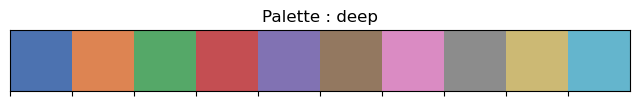

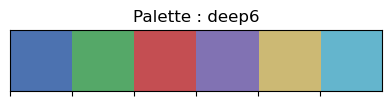

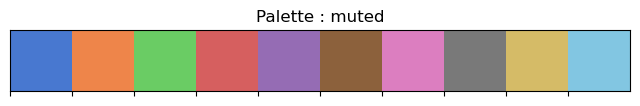

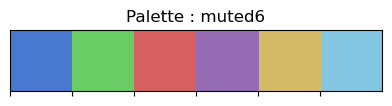

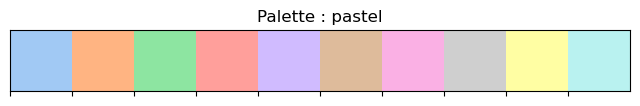

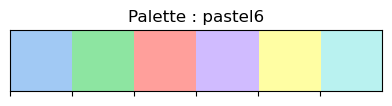

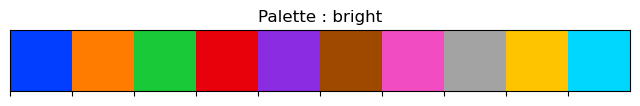

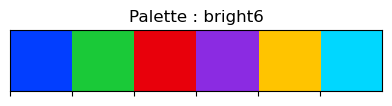

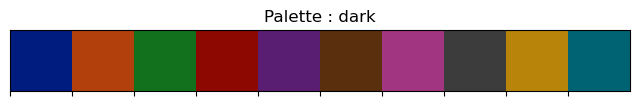

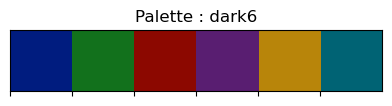

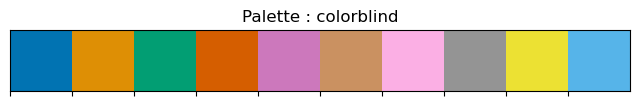

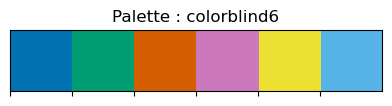

In [5]:
# Pour les palettes de matplotlib voir tout en bas de la page

sns_pal = sns.palettes.SEABORN_PALETTES
for nom_palette, couleurs in sns_pal.items():
    sns.palplot(couleurs, size=0.8)
    plt.title(f'Palette : {nom_palette}')
    plt.show()

In [6]:
# Load the "tips" dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Categorical plots
* Visualize categorical data, which consists of discrete and distinct categories or groups.
* Examples : Bar plot, Count plot, Swarm plot, Point plot, Categorical Box plot, Categorical Violin plot, Cat plot, Categorical Swarm plot etc.
* Displays the counts of observations in each category. Suitable for visualizing the frequency or distribution of categorical data.


## Bar plot

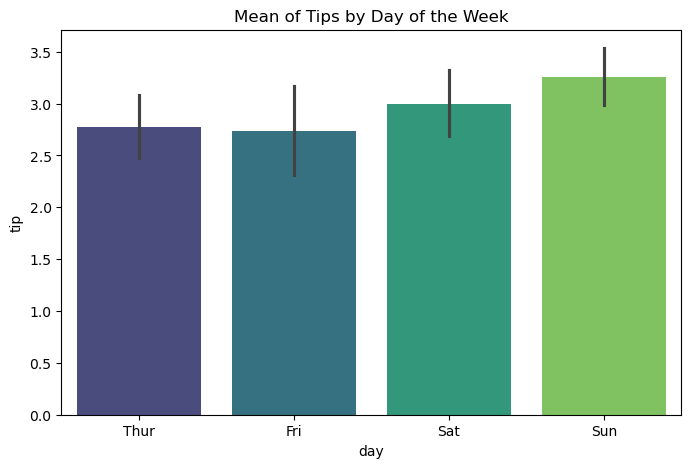

In [7]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot (tips, x="day", y="tip", palette="viridis", hue="day")              # tips, the dataframe as first param
                                                                                # viridis comes from matplotlib. Default estimator = mean
                                                                                # hue="day" sinon y a un warning
ax.set_title("Mean of Tips by Day of the Week")
plt.savefig('mean_of_tips_by_day_of_week.png')

In [8]:
# Pour vérification
moyennes_par_jour = tips.groupby('day', observed=True)['tip'].mean() # observed=True sinon warning
print("Moyennes :\n", moyennes_par_jour, "\n")


Moyennes :
 day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64 



### Version plus moderne (objet) ?

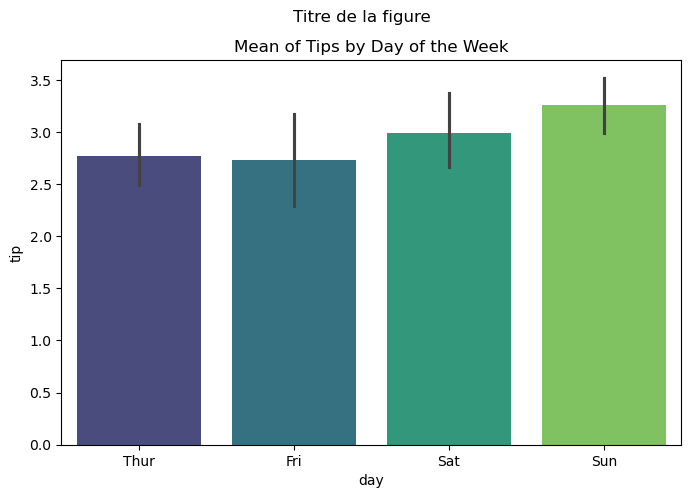

In [9]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot (tips, x="day", y="tip", palette="viridis", hue="day")              
fig.suptitle("Titre de la figure")
ax.set_title("Mean of Tips by Day of the Week")
fig.savefig('mean_of_tips_by_day_of_week.png')

### À propos des titres de la figure et des axes

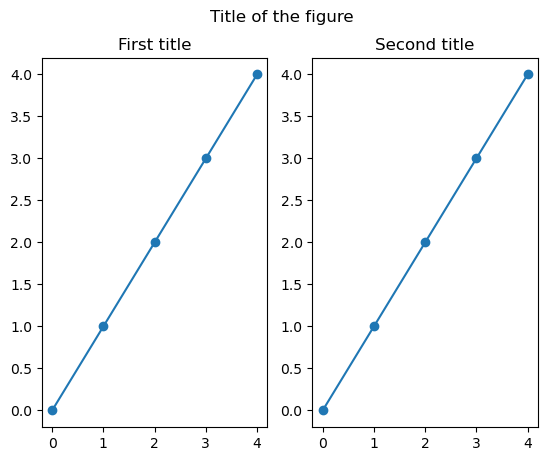

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(range(5), marker = "o")
ax2.plot(range(5), marker = "o")

fig.suptitle('Title of the figure')

ax1.set_title('First title')
ax2.set_title('Second title');

## Count plot

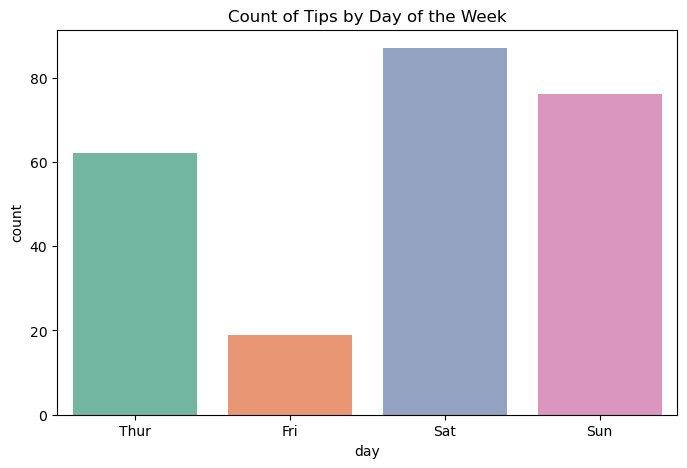

In [11]:
# Count plot
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(tips, x="day", palette="Set2", hue="day")
ax.set_title("Count of Tips by Day of the Week");

In [12]:
# Pour vérification
tips["day"].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

## Swarm plot

* it displays individual data points along each category. 
* this gives a visualization of the distribution and density of data points within categories.
* Each data point is plotted in such a way that it does not overlap with other points in the same category. 
* This makes it easier to see the density of data. But it’s difficult to visualize with larger data, so it’s effective with relatively small datasets.
* can help identify outliers or unusual data points

Text(66.97222222222221, 0.5, 'Total Bill ($)')

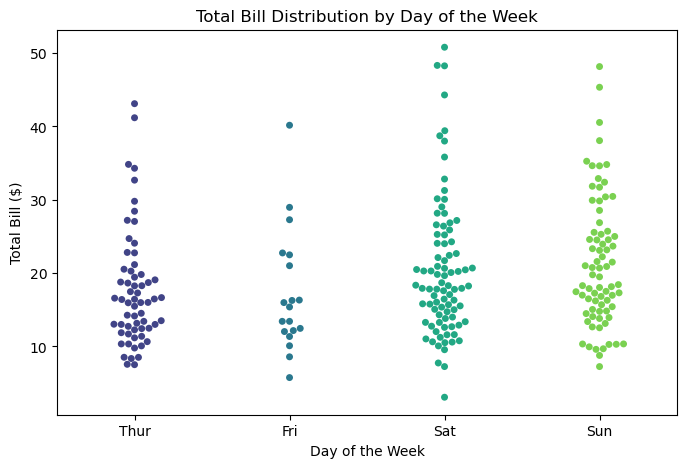

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
sns.swarmplot(tips, x="day", y="total_bill", palette="viridis", hue="day")
ax.set_title("Total Bill Distribution by Day of the Week")
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Total Bill ($)")

## Point plot

* provide insights into the distribution and central tendency of data within each category, such as a line or a point.
* point represents the average or median value of the numerical variable for each category. You can see whether there are differences in the average or median values across categories.
* This gives us idea of what is average, low, and high scores in each class

Text(0, 0.5, 'Average Total Bill ($)')

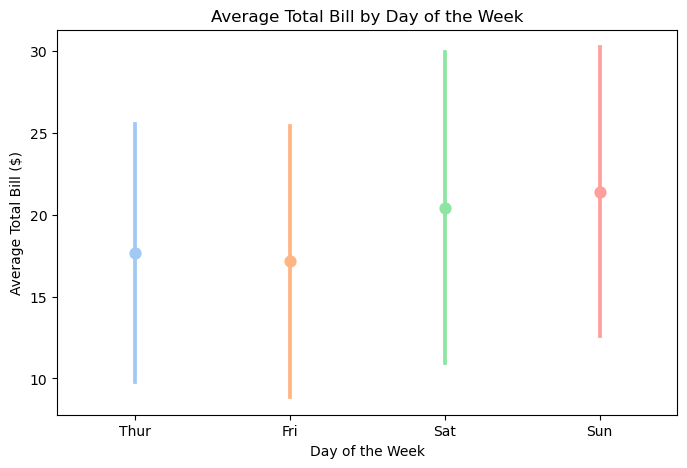

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
sns.pointplot(tips, x="day", y="total_bill", errorbar='sd', palette="pastel", hue="day")
ax.set_title("Average Total Bill by Day of the Week")
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Average Total Bill ($)")

## Categorical Box plot

* AKA Box plot
* used to visualize the distribution of a numerical variable within different categories or groups
* It displays quartiles (median, upper, and lower quartiles), potential outliers, and overall data spread.
* you can pass a numerical column to the x-axis

Text(0, 0.5, 'Total Bill ($)')

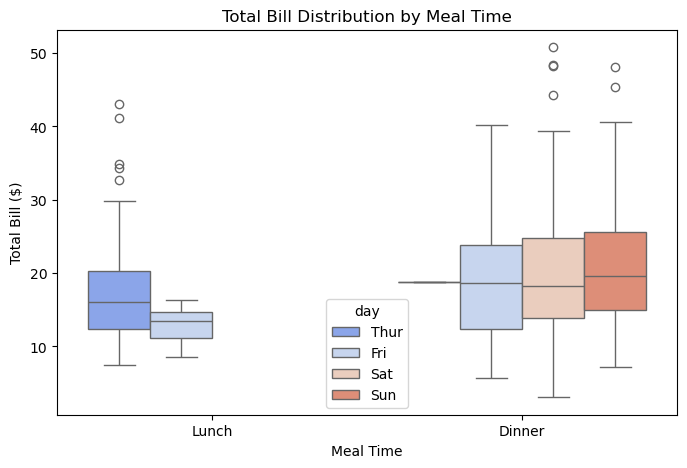

In [15]:
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(tips, x="time", y="total_bill", palette="coolwarm", hue="day", legend=True)
ax.set_title("Total Bill Distribution by Meal Time")
ax.set_xlabel("Meal Time")
ax.set_ylabel("Total Bill ($)")

* Example where a numeric value (vs category) is used as x axis.

Text(0, 0.5, 'Total Bill ($)')

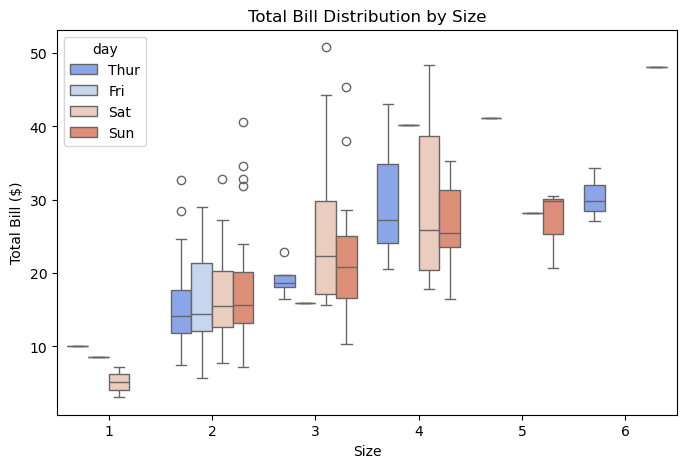

In [16]:
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(tips, x="size", y="total_bill", palette="coolwarm", hue="day")
ax.set_title("Total Bill Distribution by Size")
ax.set_xlabel("Size")
ax.set_ylabel("Total Bill ($)")

## Categorical Violin plot

* The width of the plot at a specific point indicates the density of data points at that value
* Inside the Violin, the box plot includes the median, quartiles, and potential outliers. 
* Provides a summary of the central tendency  as well as the spread of the data 
* Provide a comprehensive view of the distribution of a numerical variable within each category.

Text(0, 0.5, 'Total Bill ($)')

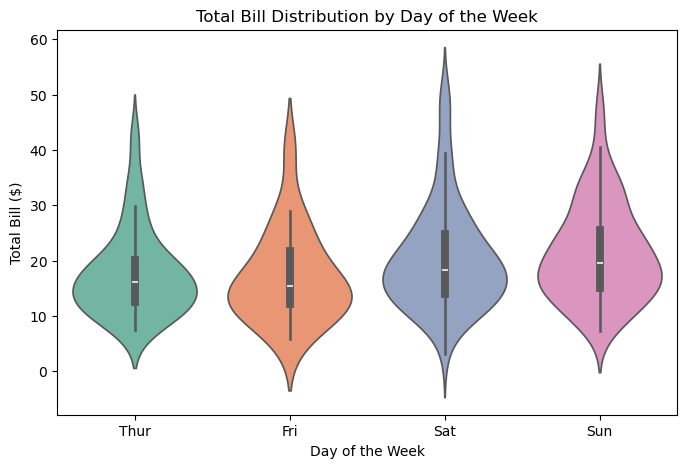

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
sns.violinplot(tips, x="day", y="total_bill", palette="Set2", hue="day")
ax.set_title("Total Bill Distribution by Day of the Week")
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Total Bill ($)")

## Cat plot

* It allows you to all the categorical plots we have seen above with just one parameter called kind in the command sns.catplot(x,y).
* You can usekind=bar, swarm , box, violin , count , point , etc. 
* Swiss army knife for the categorical plots.

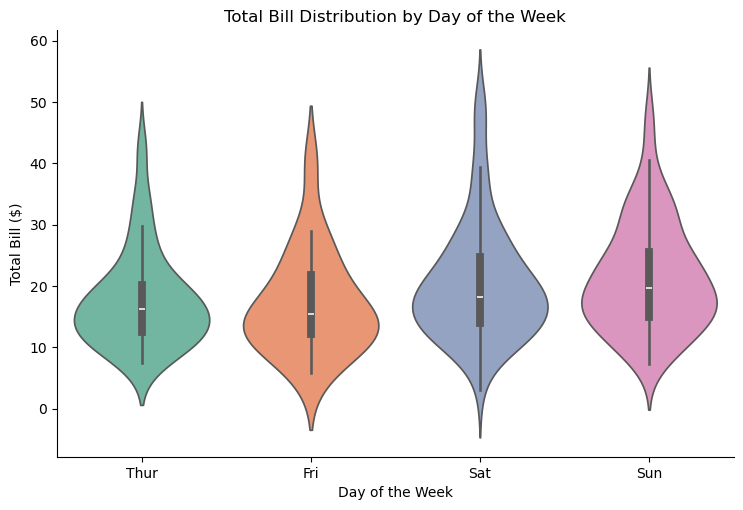

In [18]:
grid = sns.catplot(tips, x="day", y="total_bill", kind="violin", palette="Set2", hue="day")
grid.fig.set_size_inches(8,5)
grid.ax.set_title("Total Bill Distribution by Day of the Week")
grid.ax.set_xlabel("Day of the Week")
_ = grid.ax.set_ylabel("Total Bill ($)")

# Univariate plots: 

* plots that visualize a **single** variable.
* useful for understanding the distribution, and central tendency, identifying outliers, and checking for patterns or trends within a single variable.
* KDE plot, Rug plot, Dist plot, Box plot, Violin plot, Strip plot, Histogram, etc.



## KDE plot

* A KDE (Kernel Density Estimation) plot is used to estimate the probability density function of a continuous variable. 
* The continuous variable is on the x-axis and the y-axis represents the estimated probability density area under the curve sums to 1, indicating that the data distribution is normalized.
* Provide insights into the shape, peaks, modes, and spread of the data.
* Can help estimating the probability density of data points, which can be helpful in statistical analysis and hypothesis testing.

C:\Users\phili\AppData\Local\Temp\ipykernel_23896\1992689823.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.kdeplot(tips['total_bill'], fill=True, palette="muted")


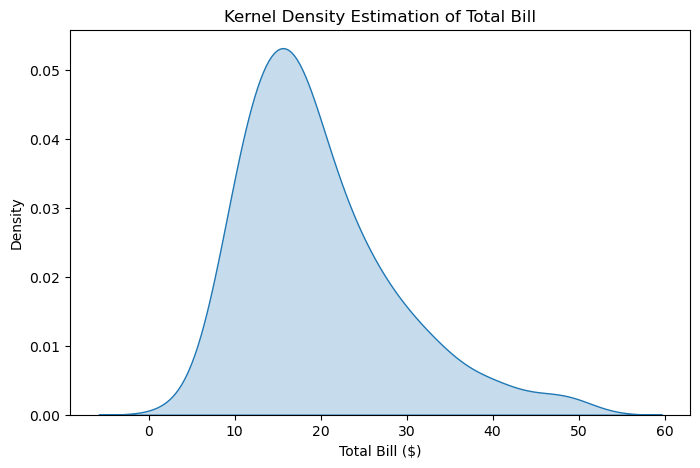

In [19]:
ax = sns.kdeplot(tips['total_bill'], fill=True, palette="muted")
ax.figure.set_size_inches(8,5)
ax.set_title("Kernel Density Estimation of Total Bill")
ax.set_xlabel("Total Bill ($)")
_ = ax.set_ylabel("Density")

## Rug plot

* Vertical lines (or “ticks”) positioned along a single axis (usually the x-axis). 
* Each tick represents the location of an individual data point
* The closeness of the ticks represents the density of the data points
* Rug plots are often combined with histograms, KDE plots, or box plots to provide additional context and detail


Text(0, 0.5, 'Density')

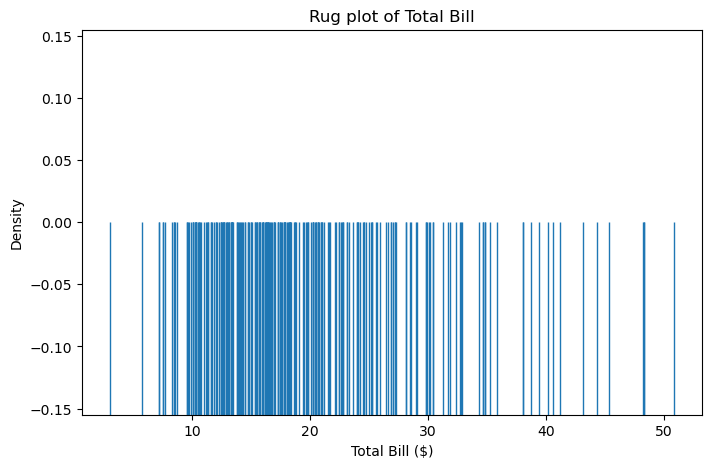

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
sns.rugplot(x=tips['total_bill'], height=0.5)
ax.set_title("Rug plot of Total Bill")
ax.set_xlabel("Total Bill ($)")
ax.set_ylabel("Density")

## Dist plot

* histogram + a smoothed curve, which is a KDE plot. 
* Divides the range of the numerical variable into bins or intervals and displays the frequency or density of data points within each bin.
* will be removed in seaborn v0.14.0

C:\Users\phili\AppData\Local\Temp\ipykernel_23896\2548122773.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=tips['total_bill'])


Text(0.5, 0, 'Total Bill ($)')

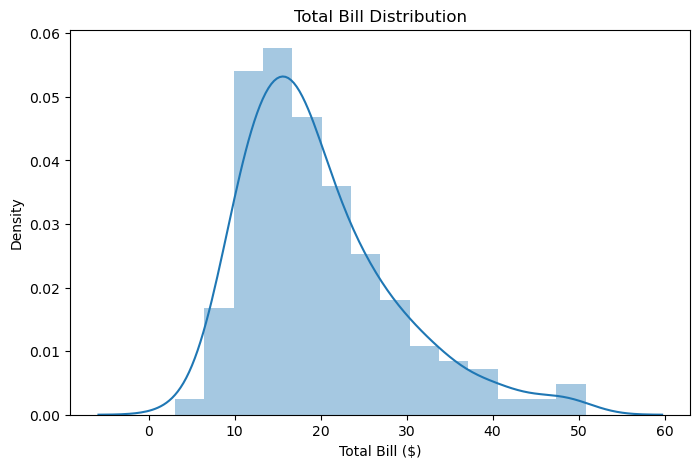

In [21]:
# will be removed in seaborn v0.14.0
# https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(a=tips['total_bill'])
ax.set_title("Total Bill Distribution")
ax.set_xlabel("Total Bill ($)")

Le code ci-dessous évite le warning à propos de sns.displot()

Text(0.5, 0, 'Total Bill ($)')

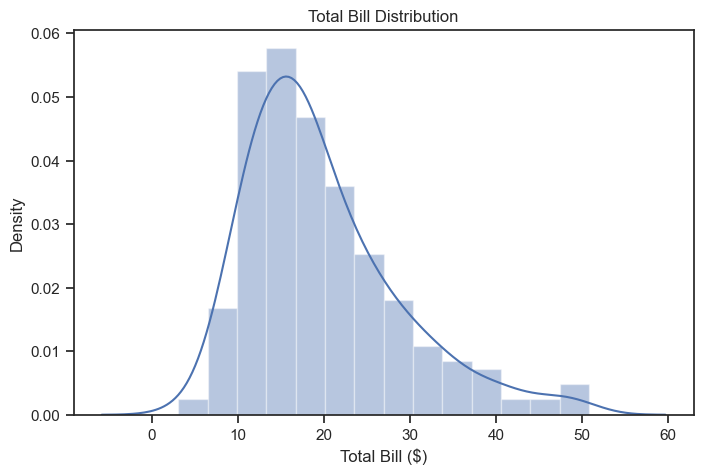

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(tips['total_bill'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4)) 
ax.set_title("Total Bill Distribution")
ax.set_xlabel("Total Bill ($)")


* Montre comment ajouter un Rug plot
* showing individual data points as small vertical lines provide insight into the density and distribution of individual data points.

Text(0.5, 0, 'Total Bill ($)')

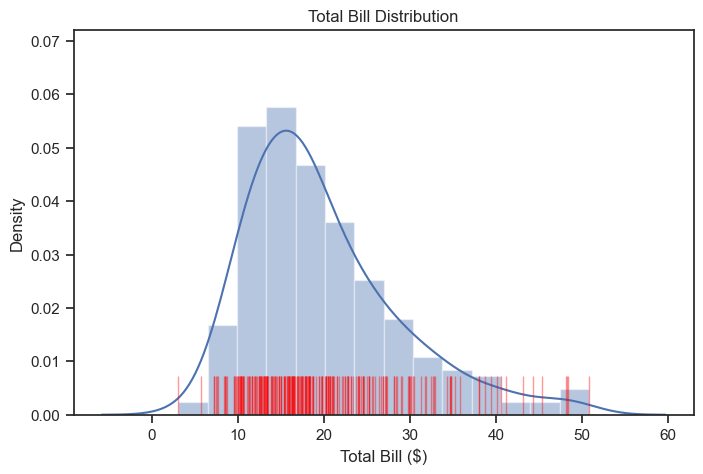

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(tips['total_bill'], kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
sns.rugplot(tips['total_bill'], height=0.1, color="red", alpha=.4) 
ax.set_title("Total Bill Distribution")
ax.set_xlabel("Total Bill ($)")


## Box plot & Violin plot

* See above 
* Pass only one variable since you want to do univariate analysis

Text(0.5, 0, 'Total Bill ($)')

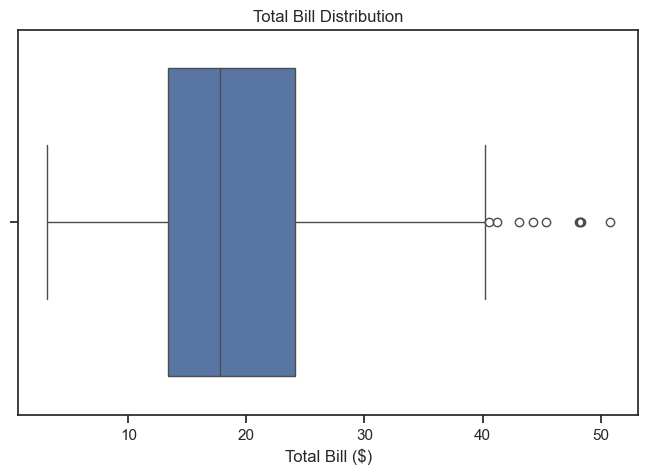

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
# Il y a un warning à propos de la palette et de hue
# sns.boxplot(tips, x='total_bill', palette="coolwarm")
sns.boxplot(tips, x='total_bill')
ax.set_title("Total Bill Distribution")
ax.set_xlabel("Total Bill ($)")

Text(0.5, 0, 'Total Bill ($)')

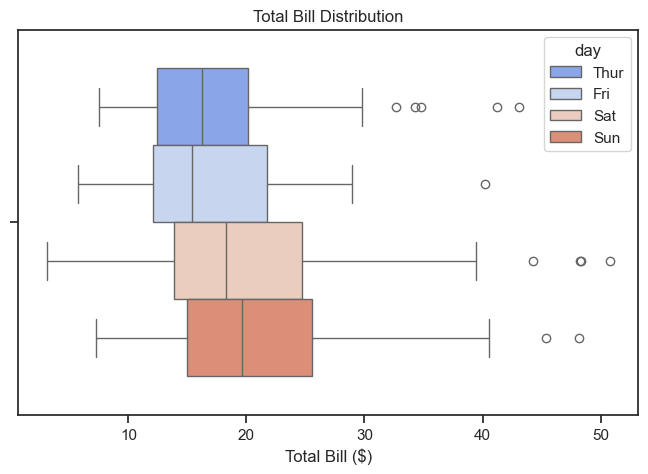

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(tips, x='total_bill', palette="coolwarm",  legend=True, hue="day")
ax.set_title("Total Bill Distribution")
ax.set_xlabel("Total Bill ($)")

## Strip plot

* Similar to a Swarm plot 
* Displays individual data points along a single axis. 
* Data points will overlap in the strip plot (use alpha)
* => Swarm plots are useful with smaller datasets and when we want to prevent overlap.

Text(0.5, 0, 'Total Bill ($)')

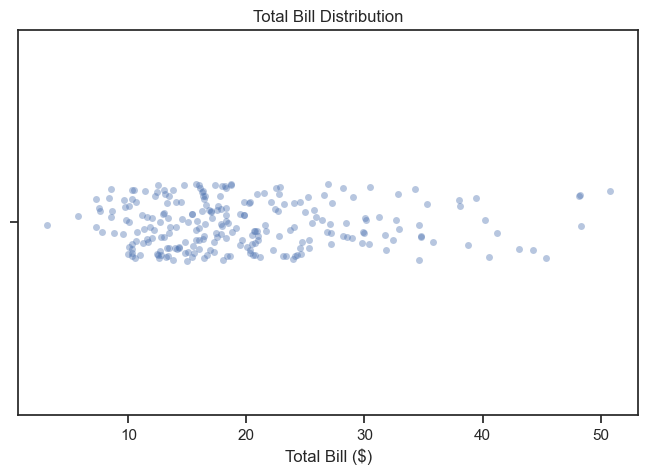

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
# sns.stripplot(x=tips['total_bill'], palette="Set1", jitter=True)
sns.stripplot(tips, x='total_bill', jitter=True, alpha=.4)
ax.set_title("Total Bill Distribution")
ax.set_xlabel("Total Bill ($)")

Text(0.5, 0, 'Total Bill ($)')

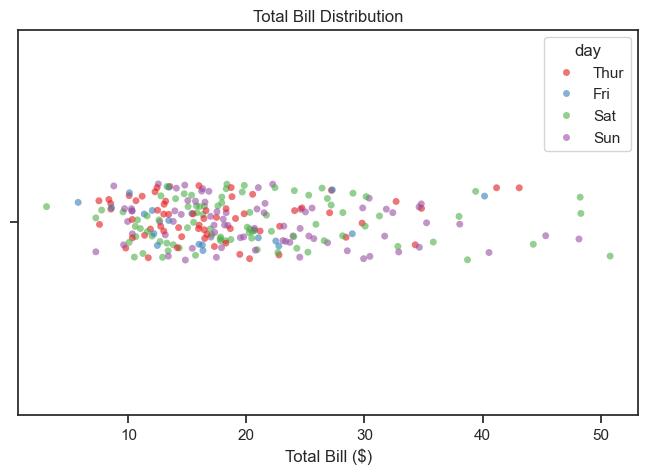

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.stripplot(tips, x='total_bill', palette="Set1", hue='day', jitter=True, alpha=.6)
ax.set_title("Total Bill Distribution")
ax.set_xlabel("Total Bill ($)")

# Bivariate plots: 

* plots that visualize the relationship between **2 variables**
* Used to explore how the two variables are related or correlated. 
* Examples : Scatter plot, Line plot, Regression plot, Join plot, Hexbin plot, etc.


## Scatter plot

Text(0.5, 0, 'Total Bill ($)')

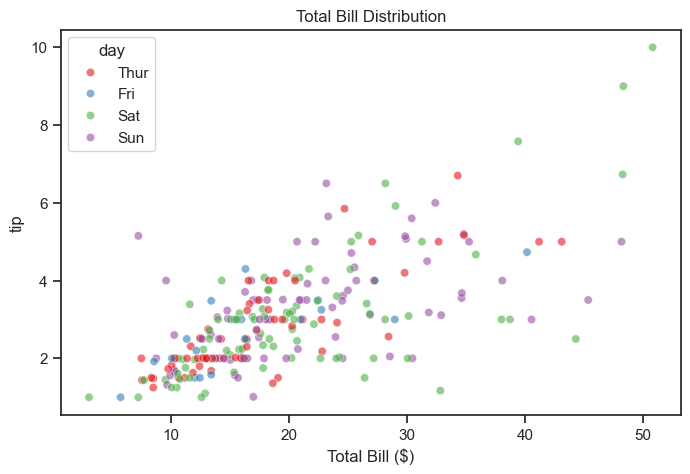

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot (tips, x='total_bill', y='tip', palette="Set1", hue='day', alpha=.6, legend=True)
ax.set_title("Total Bill Distribution")
ax.set_xlabel("Total Bill ($)")

## Line plot

Text(0, 0.5, 'y')

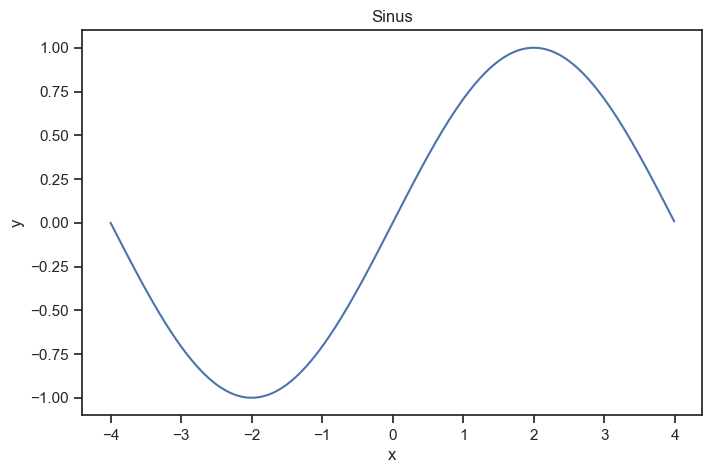

In [ ]:
x = np.arange(-4, 4, 0.01)
y = np.sin (np.pi*x/4)

fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot (x=x, y=y)
ax.set_title("Sinus")
ax.set_xlabel("x")
ax.set_ylabel("y")

## Regression plot

* underline the relationship between two numerical variables
* the independent variable (often on the x-axis) 
* the dependent variable (on the y-axis). 
* Individual data points are displayed as dots 
* The regression line or curve, which represents the best-fitting linear model that describes the relationship between the variables.

Text(0, 0.5, 'Tip ($)')

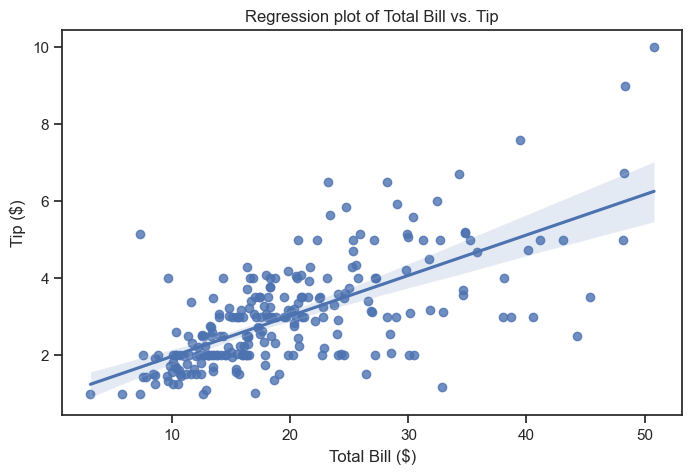

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(tips, x="total_bill", y="tip")
ax.set_title("Regression plot of Total Bill vs. Tip")
ax.set_xlabel("Total Bill ($)")
ax.set_ylabel("Tip ($)")

Text(0, 0.5, 'Tip ($)')

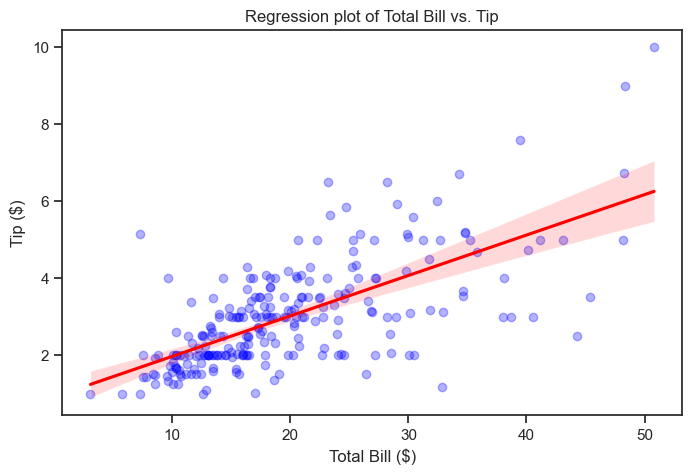

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
# {scatter,line}_kwsdictionaries : Additional keyword arguments to pass to plt.scatter and plt.plot
sns.regplot(tips, x="total_bill", y="tip", scatter_kws={"color": "blue", "alpha":.3}, line_kws={"color": "red"})
ax.set_title("Regression plot of Total Bill vs. Tip")
ax.set_xlabel("Total Bill ($)")
ax.set_ylabel("Tip ($)")

In [ ]:
#
# TODO : show a regplot with logistic=True

## Joint plot

* Combines scatter plots, histograms, and density plots 
* There are histograms or Kernel Density Estimation (KDE) plots for each individual variable. 
* Ther show the distribution of each variable separately.

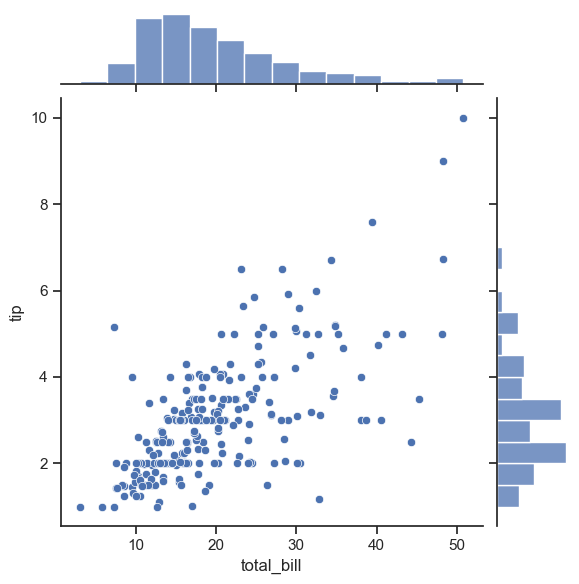

In [ ]:
# kind = “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” 
_ = sns.jointplot(tips, x="total_bill", y="tip", kind="scatter")

Assigning a hue variable :
* add colors to the scatterplot 
* draw separate density curves (using kdeplot()) on the marginal axes

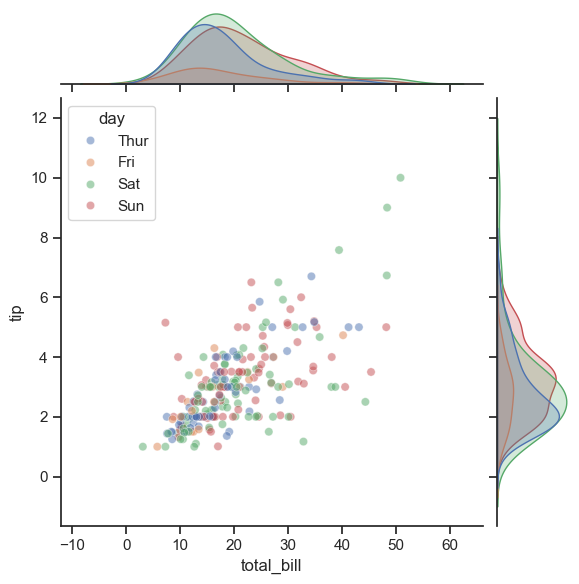

In [ ]:
_ = sns.jointplot(tips, x="total_bill", y="tip", alpha=.5, hue="day")


## Hexbin plot

* Hexagonal Binning plot
* Groups data points into hexagonal bins
* Help to visualize data density and patterns 
* Valuable with large datasets when scatter plots points become too crowded

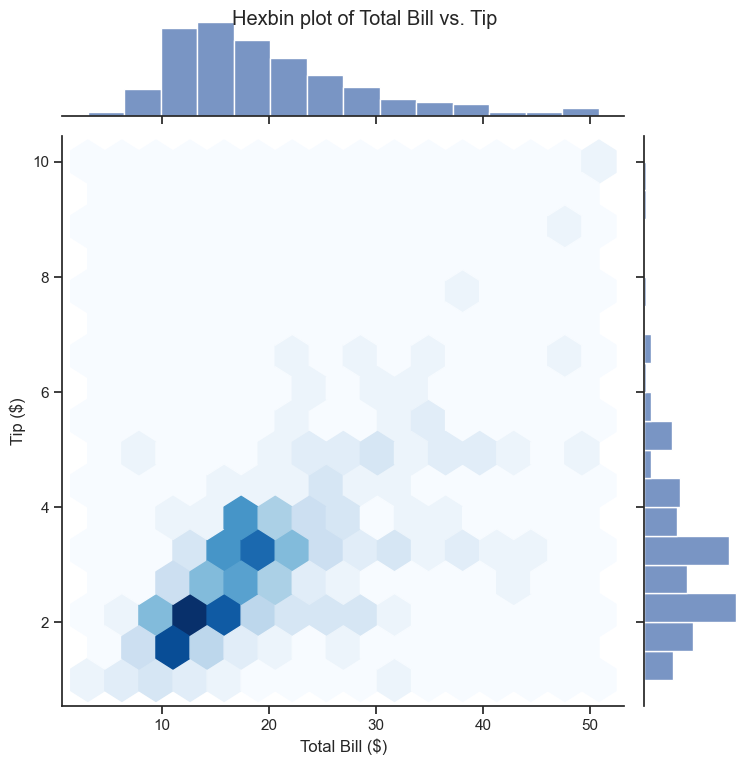

In [ ]:
# fig, ax = plt.subplots(figsize=(8,5))
grid = sns.jointplot(tips, x="total_bill", y="tip",kind='hex', gridsize=15, cmap="Blues")
grid.fig.set_size_inches(8,8)
grid.fig.suptitle("Hexbin plot of Total Bill vs. Tip")
_ = grid.set_axis_labels("Total Bill ($)", "Tip ($)")

# Multivariate plots
* plots that involve more than two variables.
* Example : Pair plot, Facet Grid, Relational plot.


## Using Parameters to add dimensions

### Using Hue parameter

* See examples above
* Add color to the plot based on the provided categorical variable, specifying a unique color for each of the categories. 
* Can be used with most of the plots : .scatterplot(), .boxplot(), .violinplot(), .lineplot()...

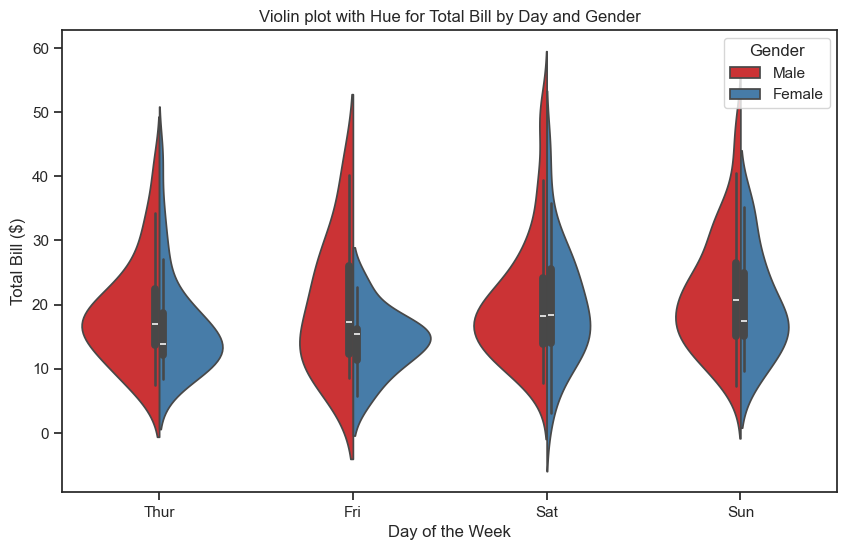

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(
    tips, 
    x="day",         # x-axis: Days of the week (categorical)
    y="total_bill",  # y-axis: Total bill amount (numerical)
    hue="sex",       # Color by gender (categorical)
    palette="Set1",  # Color palette
    split=True       # Split violins by hue categories
)

ax.set_title("Violin plot with Hue for Total Bill by Day and Gender")
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Total Bill ($)")
plt.legend(title="Gender")
plt.show()

### Using hue and size parameters

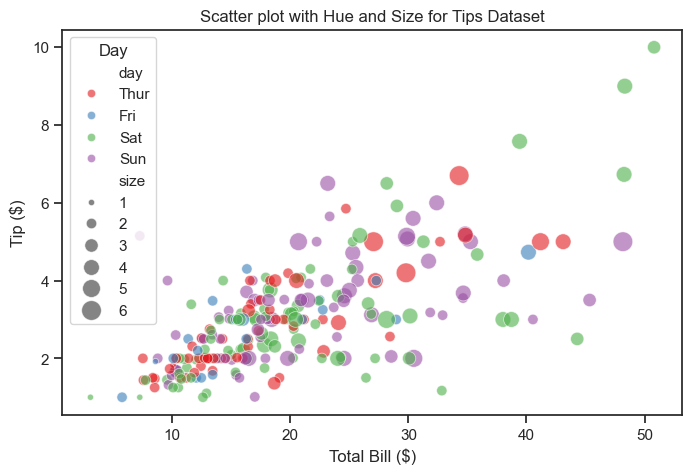

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(
    tips, 
    x="total_bill", 
    y="tip", 
    hue="day",      # Color by day (categorical)
    size="size",    # Vary marker size by size column (numerical)
    sizes=(20, 200),  # Define the size range for markers
    palette="Set1",  # Color palette
    alpha = 0.6
)
ax.set_title("Scatter plot with Hue and Size for Tips Dataset")
ax.set_xlabel("Total Bill ($)")
ax.set_ylabel("Tip ($)")
_ = ax.legend(title="Day")

## Relational plot

* To visualize the relationship between two numerical variables, along with additional categorical or numerical dimensions.
* Hue parameter to color data points by a categorical variable
* Size parameter to vary marker size based on a numerical variable
* Style parameter to differentiate markers or lines by a categorical variable. 
* Kind parameter to specify the type of relational plot you want to create.

In [ ]:
#
# TODO : Ajouter plus d'exemples avec .relplot()

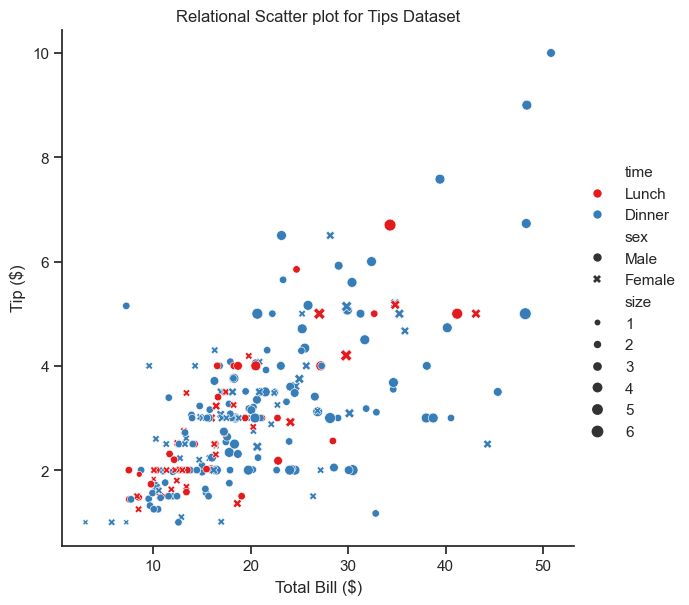

In [ ]:
# fig, ax = plt.subplots(figsize=(8,5))
grid = sns.relplot(
  tips, 
  x="total_bill", 
  y="tip", 
  hue="time", 
  style="sex", 
  size="size", 
  palette="Set1", 
  height=6
)

grid.ax.set_title("Relational Scatter plot for Tips Dataset")
grid.ax.set_xlabel("Total Bill ($)")
_ = grid.ax.set_ylabel("Tip ($)")

## Use col and row parameters of .relplot() to create a FacetGrid

* Assign the categories to col and row parameter of .relplot()
* Allow to visualize relationships within different subsets of the data. 

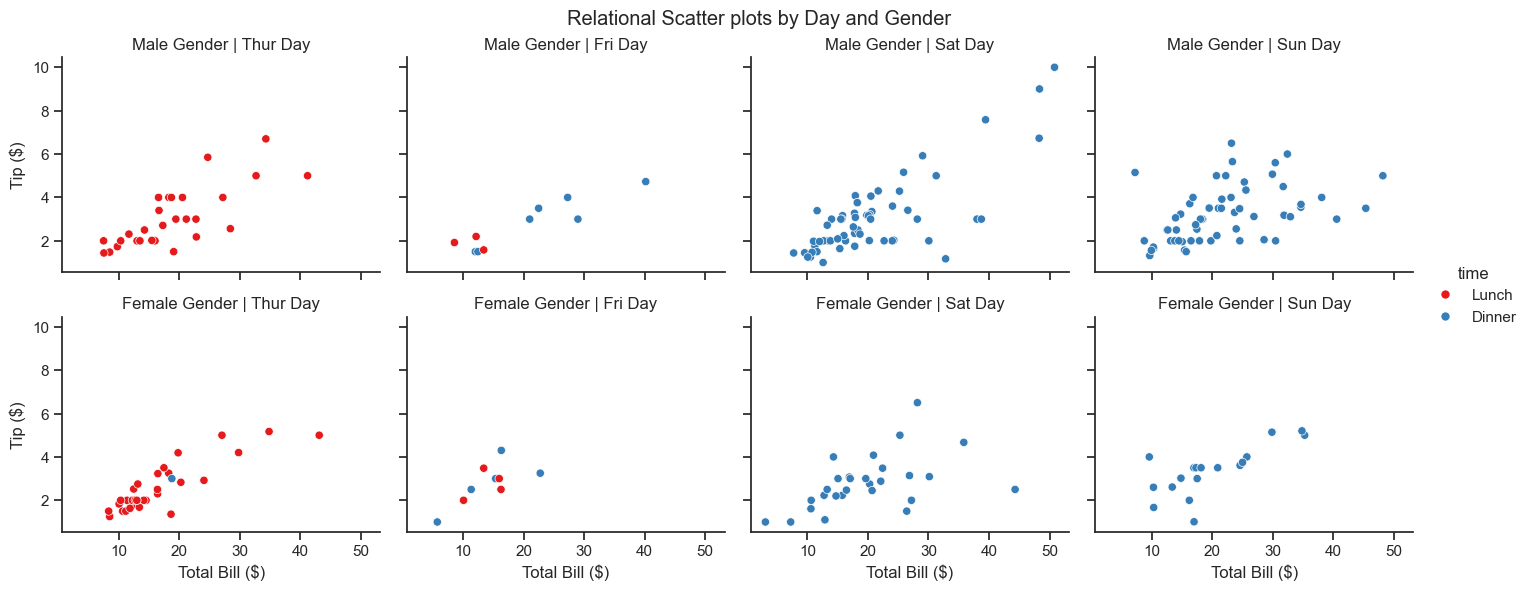

In [ ]:
grid = sns.relplot(
    tips,
    x="total_bill",
    y="tip",
    hue="time",
    col="day",  # ! Separate plots by day (columns)
    row="sex",  # ! Separate plots by gender (rows)
    palette="Set1",
    height=3,   # Height of each subplot
    aspect=1.2  # Aspect ratio of each subplot
)

# Set titles and labels for the facets
grid.set_titles(col_template="{col_name} Day", row_template="{row_name} Gender")
grid.set_axis_labels("Total Bill ($)", "Tip ($)")
plt.suptitle("Relational Scatter plots by Day and Gender")
plt.subplots_adjust(top=0.9)  # Adjust the title position

## Facet Grid

* Allows to create a grid of subplots
* Each representing a different subset of the data. 
* Facet Grids are used to compare patterns or relationships with multiple variables within different categories.
* sns.FacetGrid() returns a grid object
* The grid must then be mapped to map it the plot of our choice

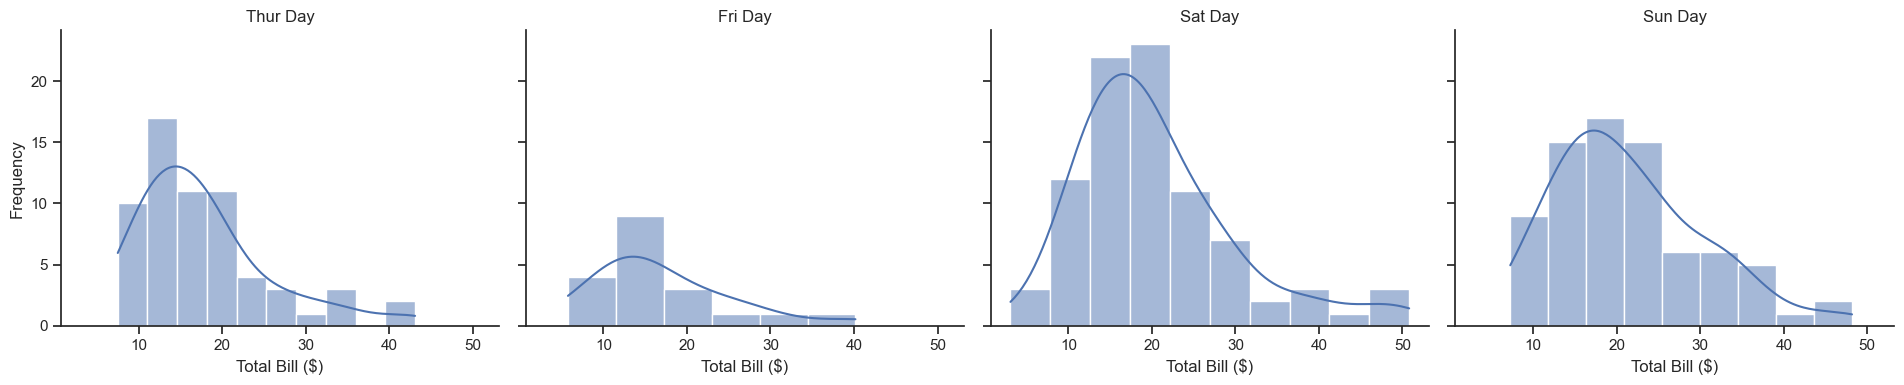

In [ ]:
grid = sns.FacetGrid(
  tips, 
  col="day",  # les jours en colonnes
  height=4,   # Height of each subplot
  aspect=1.2  # Aspect ratio of each subplot
)
grid.map(sns.histplot, "total_bill", kde=True)          # ! map the grid to sns.histplot
grid.set_axis_labels("Total Bill ($)", "Frequency")
_ = grid.set_titles(col_template="{col_name} Day")

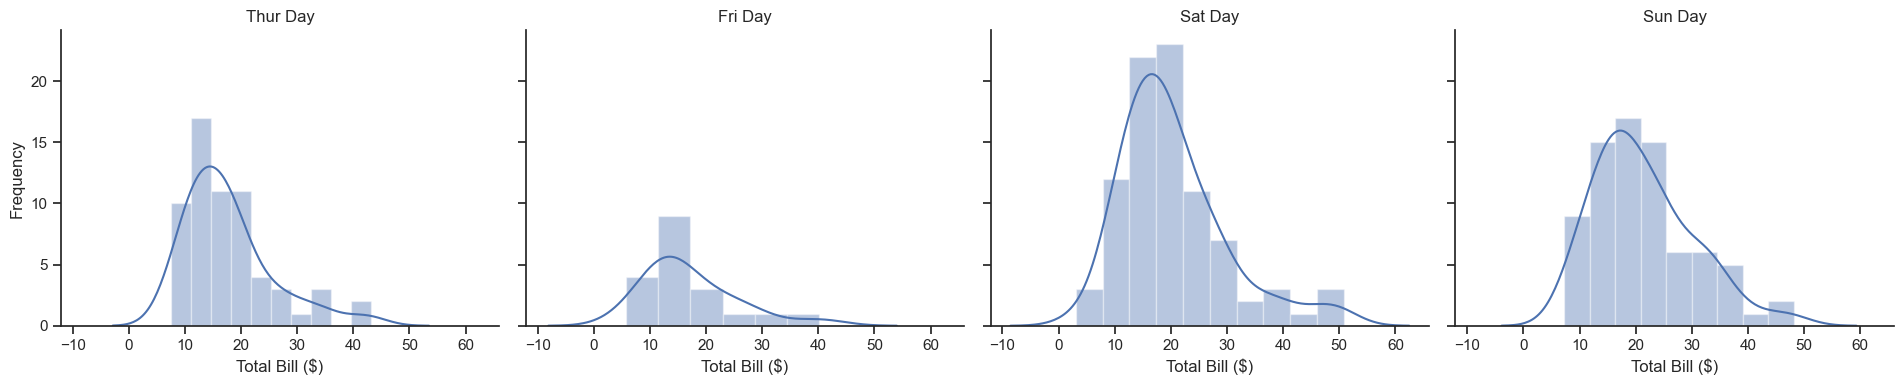

In [ ]:
grid = sns.FacetGrid(
  tips, 
  col="day", 
  height=4,   # Height of each subplot
  aspect=1.2  # Aspect ratio of each subplot
)
grid.map(sns.histplot, "total_bill", kde=True, kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
grid.set_axis_labels("Total Bill ($)", "Frequency")
_ = grid.set_titles(col_template="{col_name} Day")

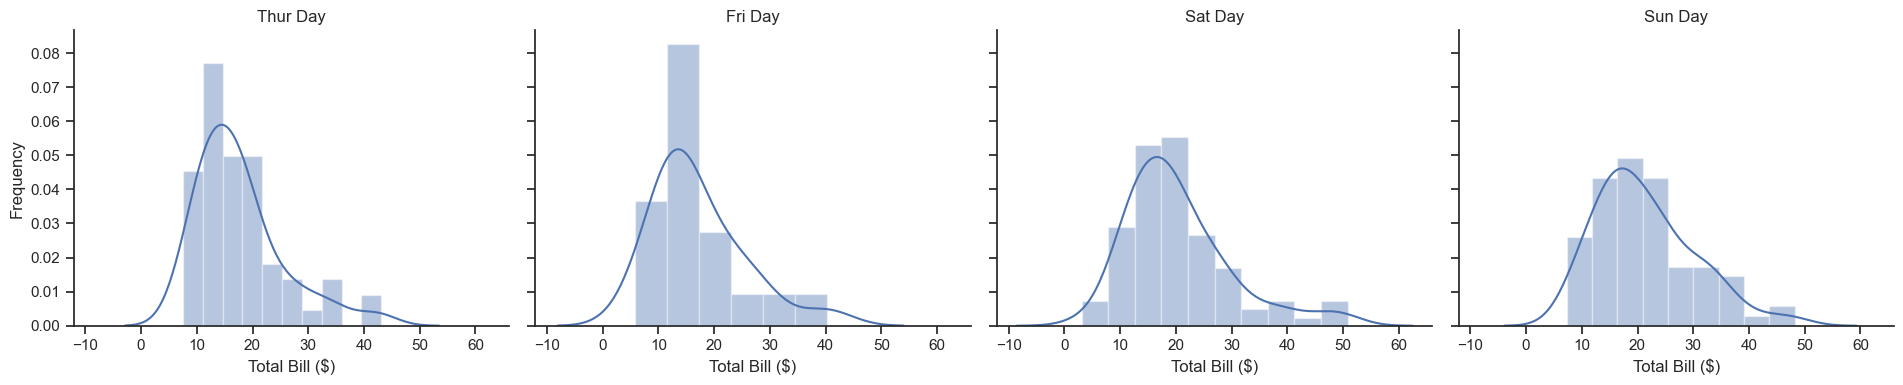

In [ ]:
grid = sns.FacetGrid(
  tips, 
  col="day", 
  height=4,   # Height of each subplot
  aspect=1.2  # Aspect ratio of each subplot
)
# density
grid.map(sns.histplot, "total_bill", kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
grid.set_axis_labels("Total Bill ($)", "Frequency")
_ = grid.set_titles(col_template="{col_name} Day")

## Pair plot

* Provides a grid of scatterplots, and histograms
* Each plot shows the relationship between two variables
* The diagonal cells typically display histograms or kernel density plots for individual variables
* The off-diagonal cells in the grid display scatterplots, showing how the two variables are related. 

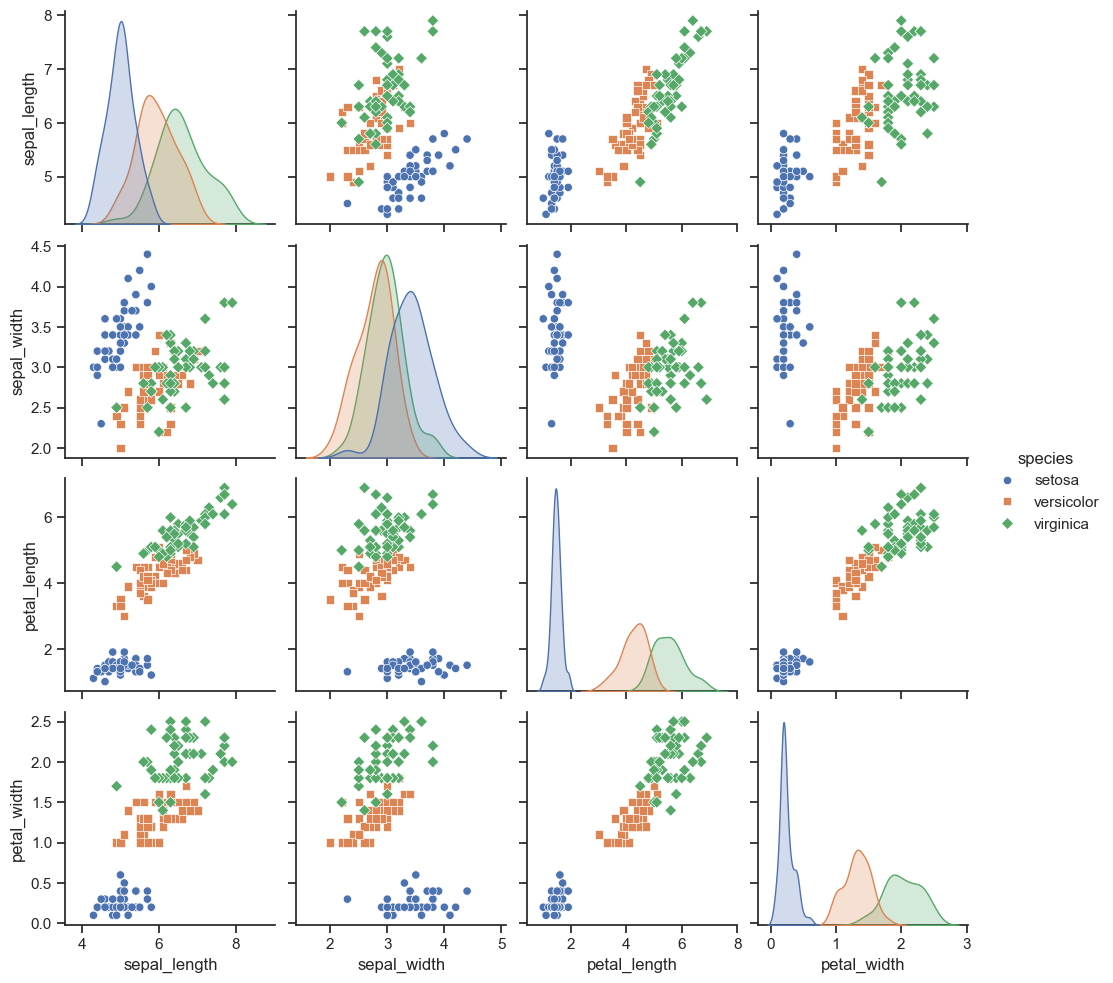

In [ ]:
iris = sns.load_dataset("iris")

sns.set(style="ticks")
_ = sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

## Pair grid

* Lower, upper, and diagonal plots can be customized individually

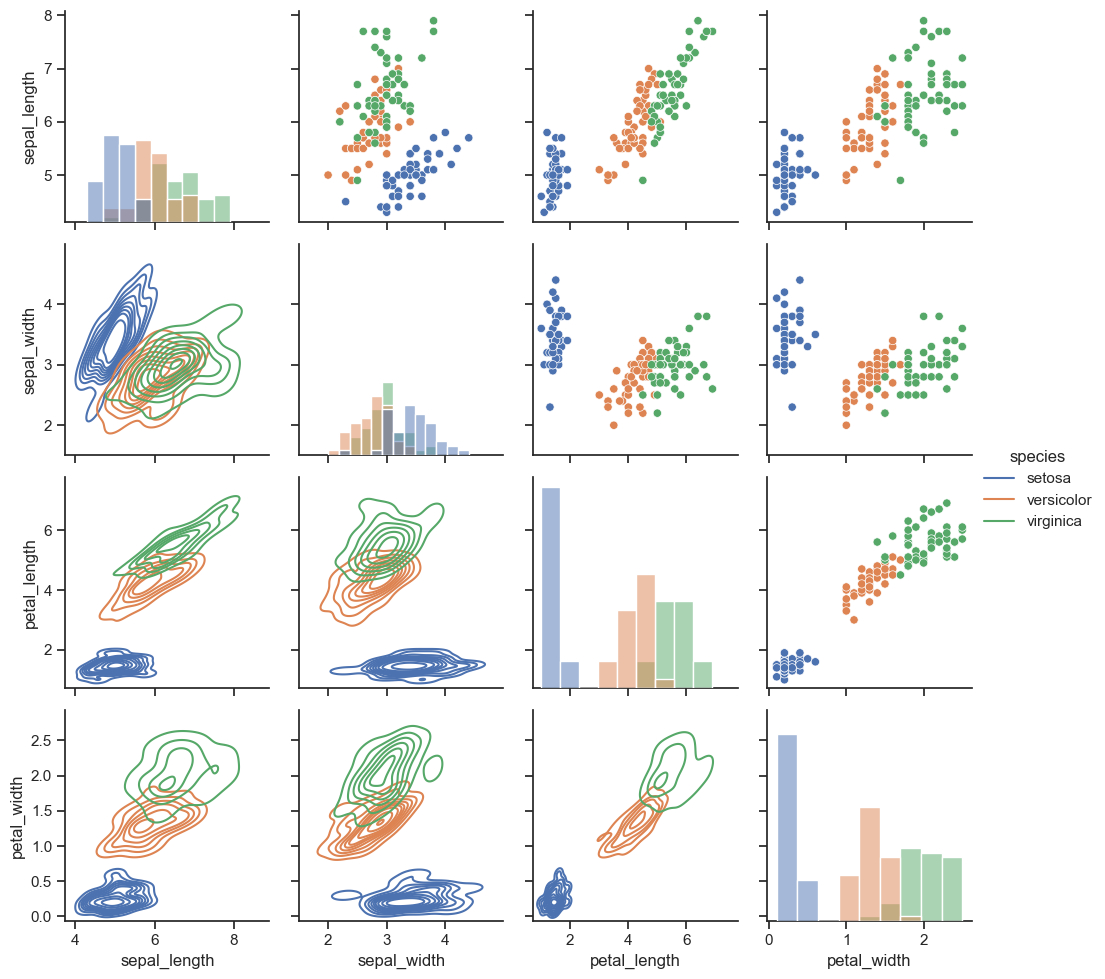

In [ ]:
iris = sns.load_dataset("iris")

g = sns.PairGrid(iris, hue="species")
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde_kws={"color": "k"})
g.map_lower(sns.kdeplot)
_ = g.add_legend()

# Matrix plots: 

* Visualize relationships within matrices of data.
* Examples : Heatmap, Cluster Map.

## Heatmap

* Show how a numeric variable is correlated with all other numeric variables 
* Call df.corr() pandas method to get the correlations
* Pass it to sns.heatmap() seaborn method to plot the heatmap. 

Text(0.5, 1.0, 'Correlation Heatmap of Titanic dataset')

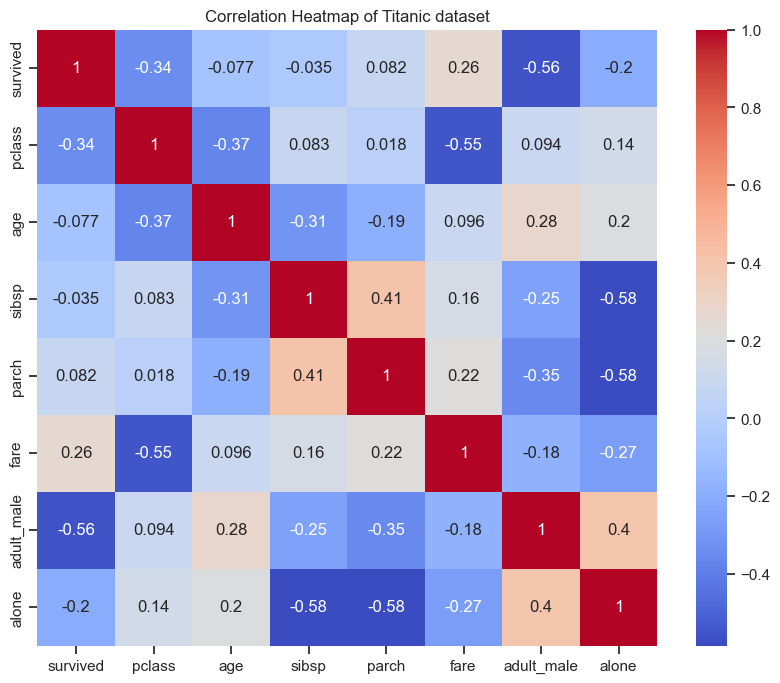

In [ ]:
titanic = sns.load_dataset('titanic')
correlation_matrix = titanic.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
ax.set_title("Correlation Heatmap of Titanic dataset")


## Cluster Map

* A kind of heatmap that not only displays data as a heatmap but also arranges rows and columns in a way that groups similar data together
* It uses hierarchical clustering algorithms to reorder rows and columns in the heatmap. 
* To the side of the grouped heatmap, include dendrograms to make it a cluster map. 
* Dendrograms are tree-like diagrams that show the hierarchical relationships between rows and columns.

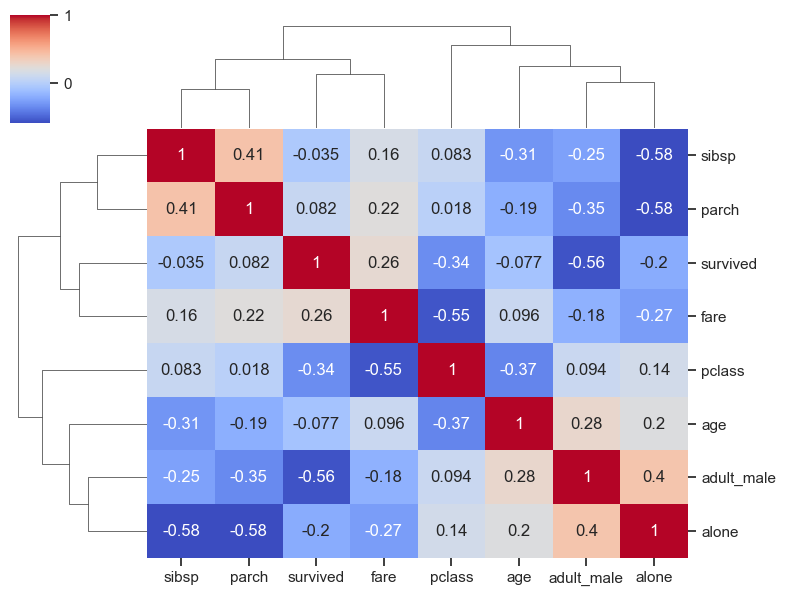

In [ ]:
data = sns.load_dataset("titanic")
grid = sns.clustermap(data.corr(numeric_only=True) , annot=True, cmap="coolwarm", figsize=(8, 6))
# ax.set_title("Cluster Map of Iris Dataset Correlation")

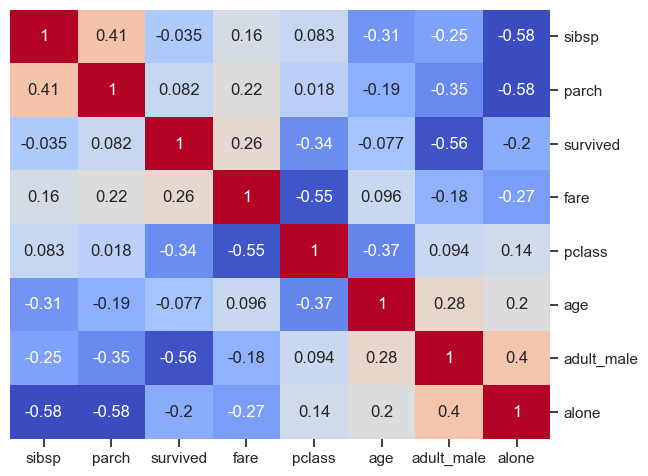

In [ ]:
data = sns.load_dataset("titanic")

grid = sns.clustermap(data.corr(numeric_only=True) , annot=True, cmap="coolwarm", figsize=(8, 6))
grid.cax.set_visible(False) # Hide the legend but also the title. Don't know how to fix it
grid.ax_row_dendrogram.set_visible(False)
grid.ax_col_dendrogram.set_visible(False)

# ax.set_title("Cluster Map of Iris Dataset Correlation")

# Palettes de matplotlib

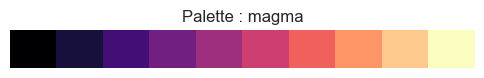

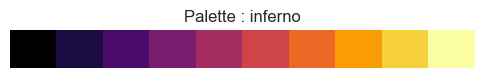

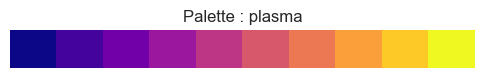

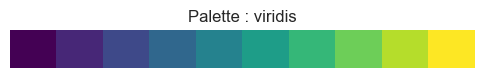

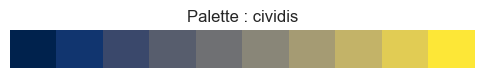

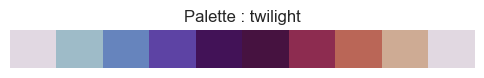

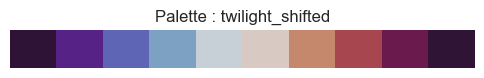

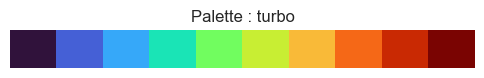

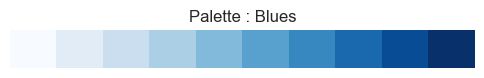

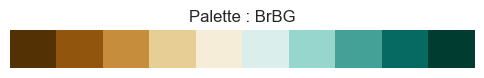

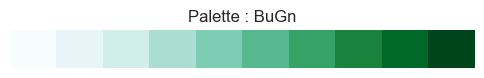

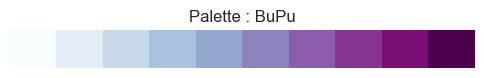

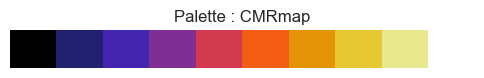

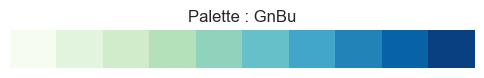

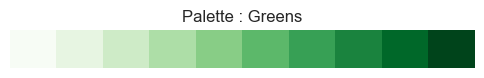

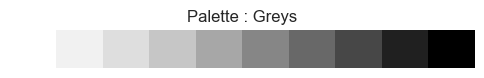

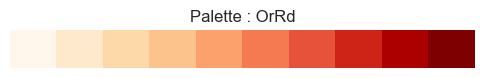

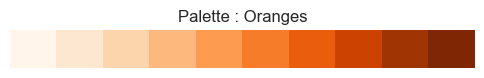

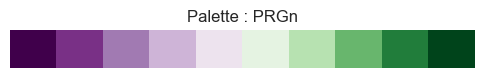

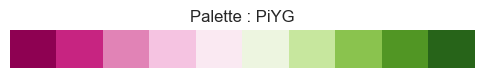

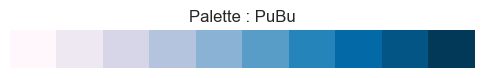

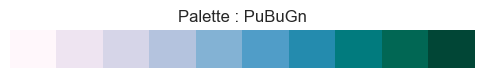

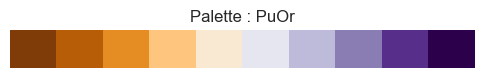

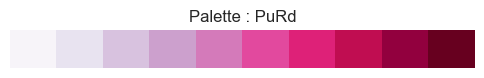

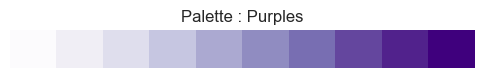

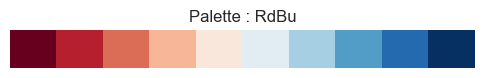

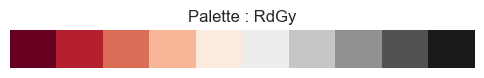

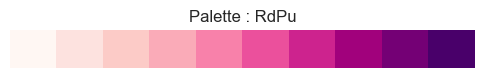

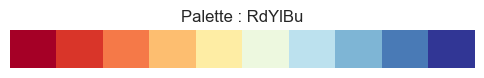

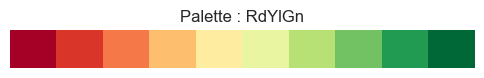

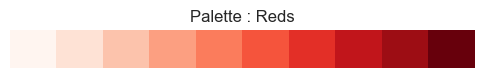

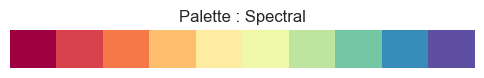

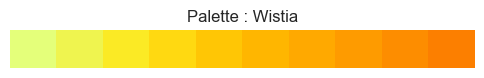

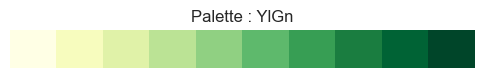

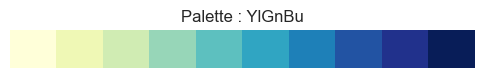

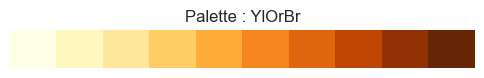

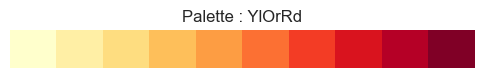

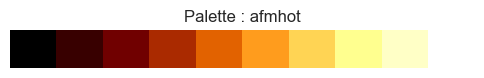

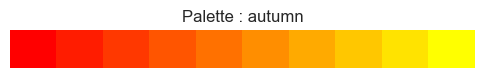

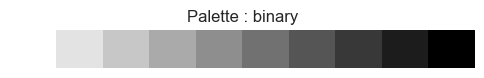

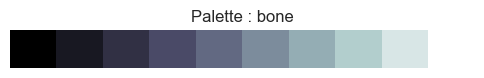

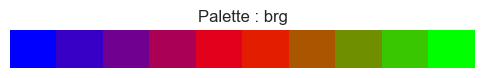

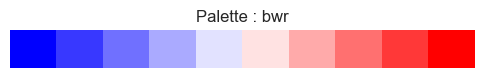

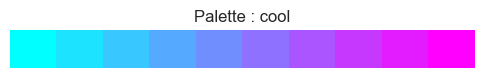

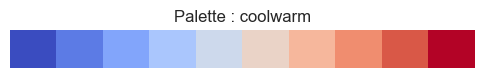

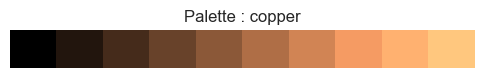

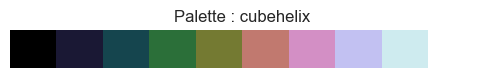

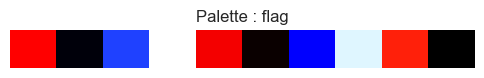

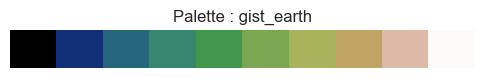

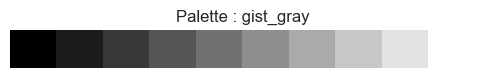

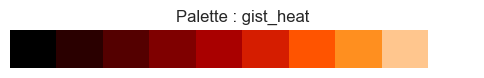

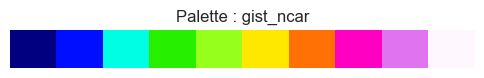

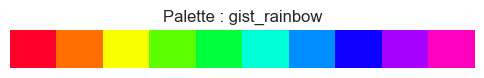

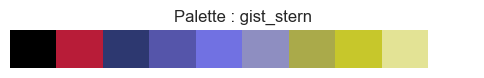

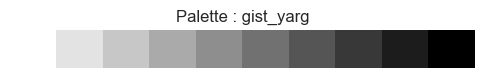

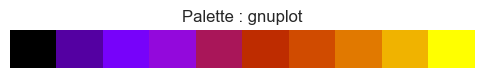

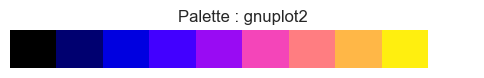

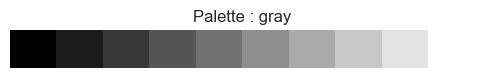

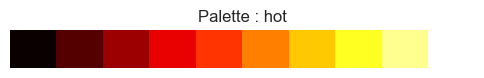

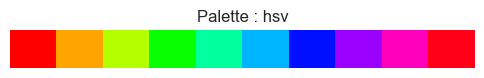

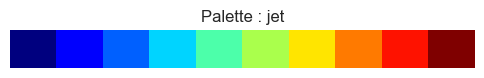

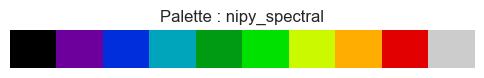

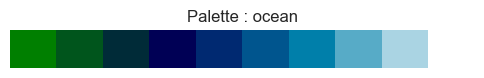

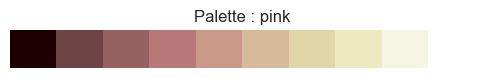

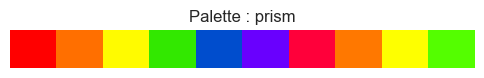

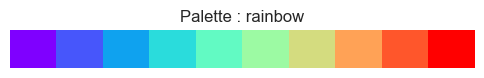

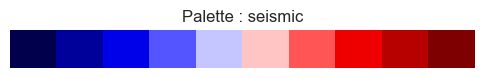

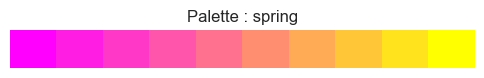

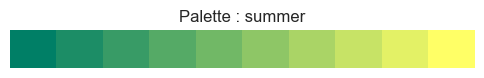

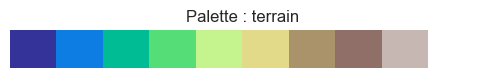

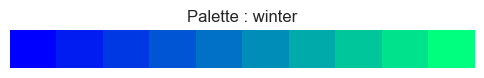

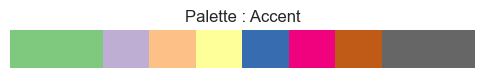

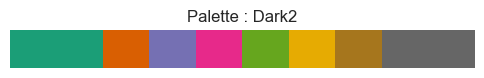

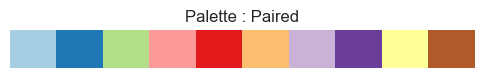

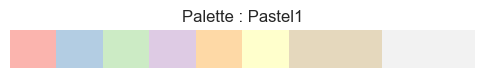

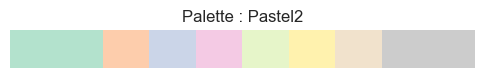

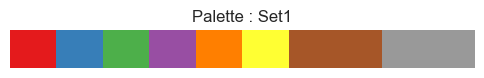

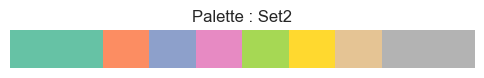

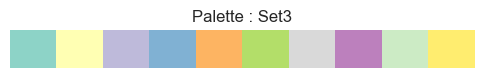

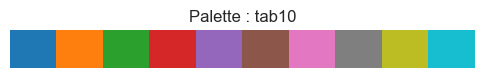

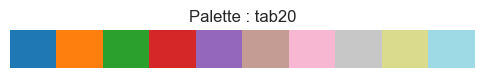

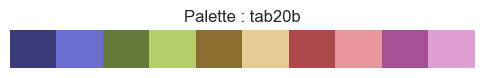

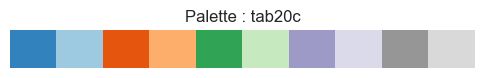

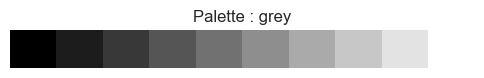

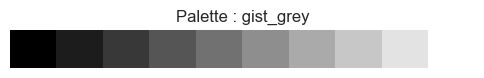

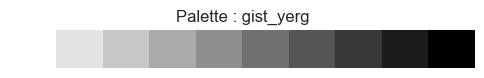

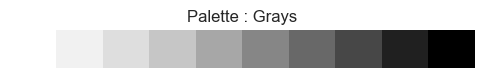

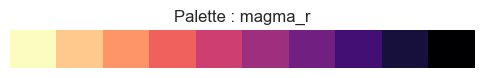

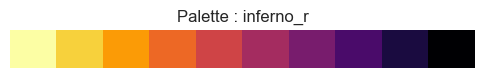

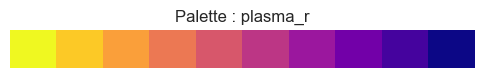

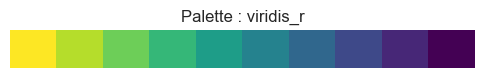

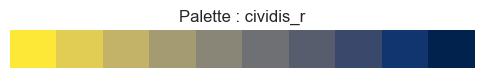

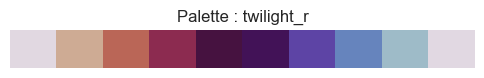

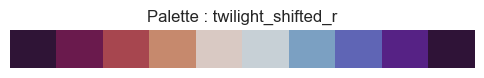

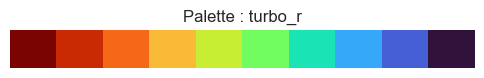

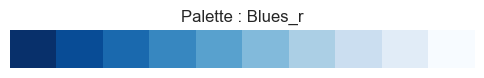

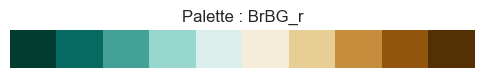

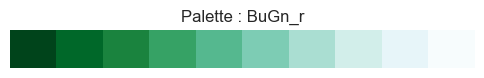

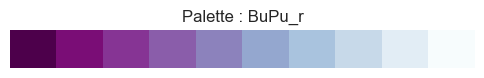

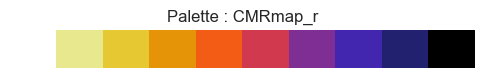

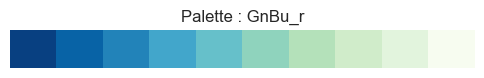

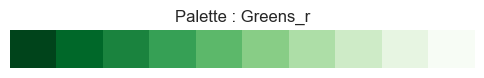

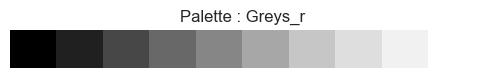

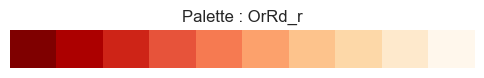

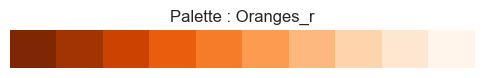

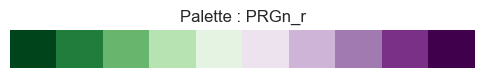

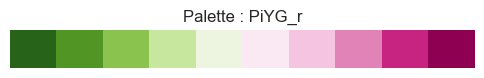

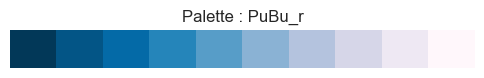

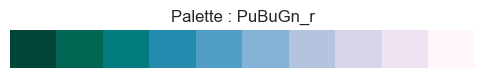

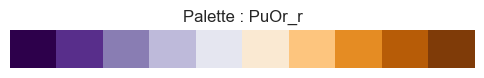

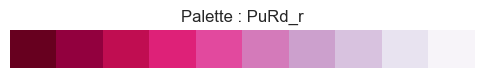

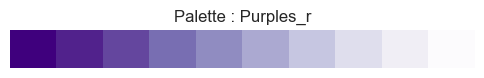

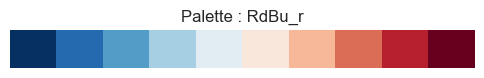

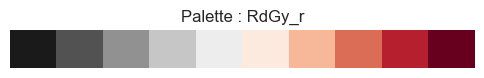

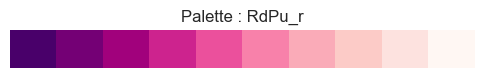

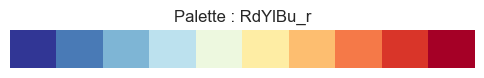

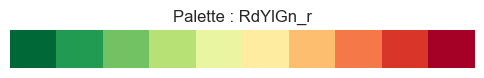

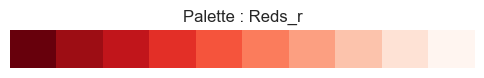

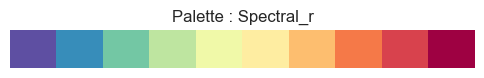

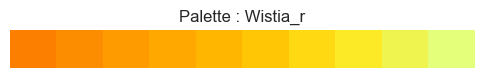

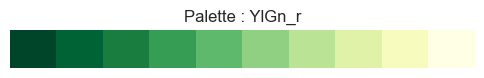

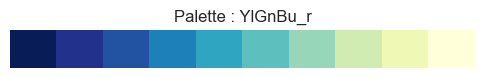

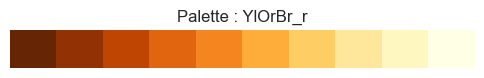

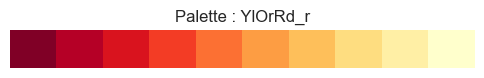

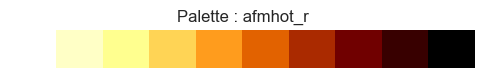

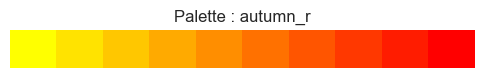

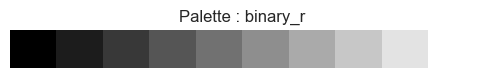

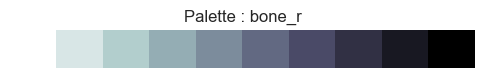

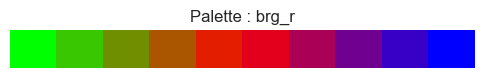

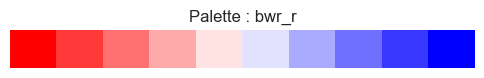

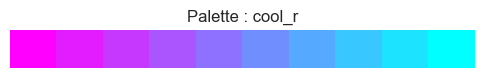

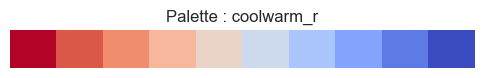

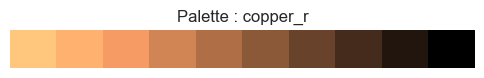

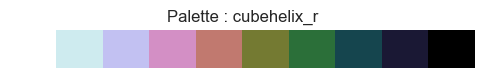

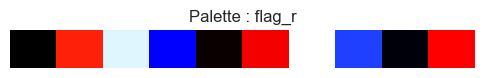

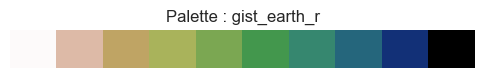

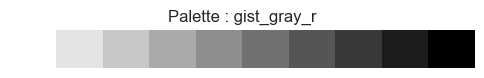

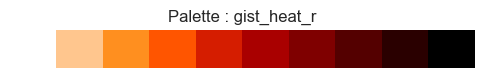

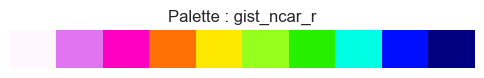

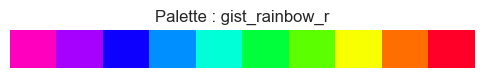

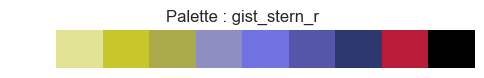

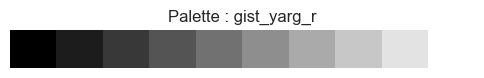

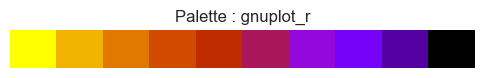

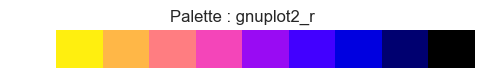

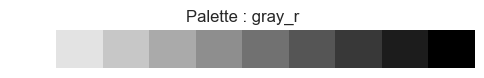

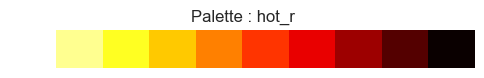

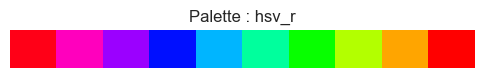

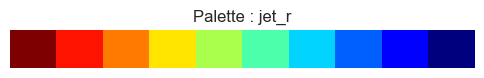

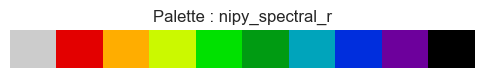

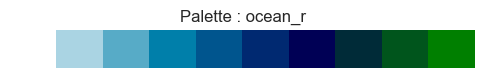

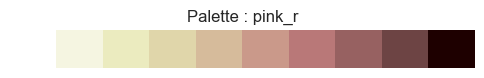

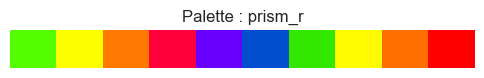

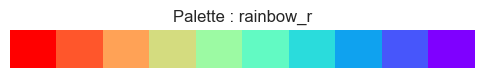

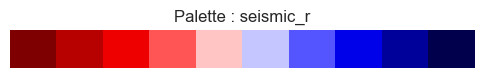

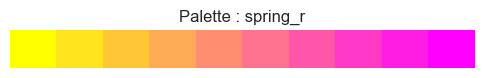

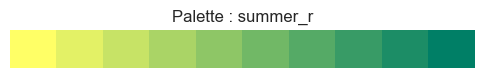

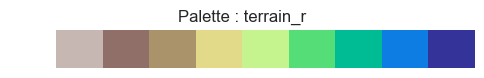

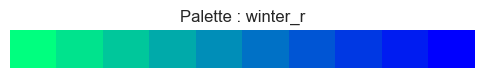

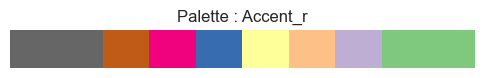

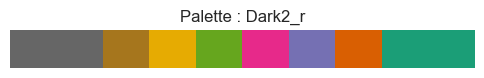

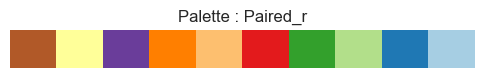

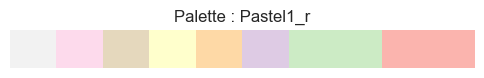

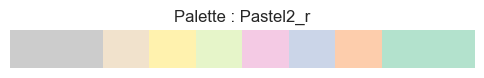

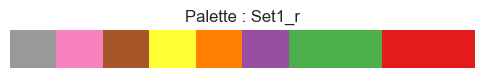

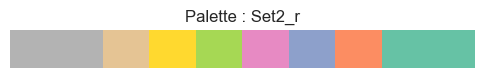

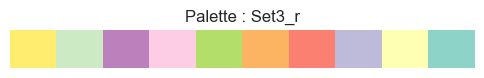

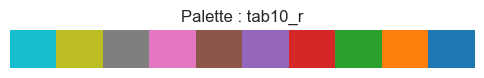

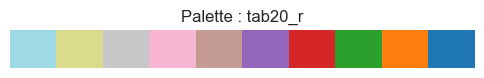

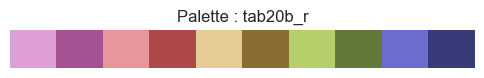

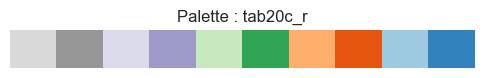

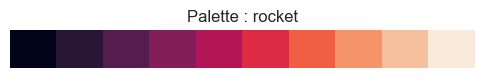

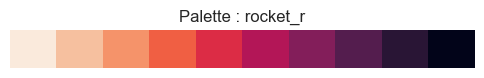

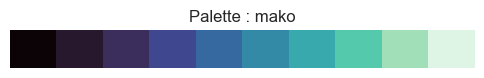

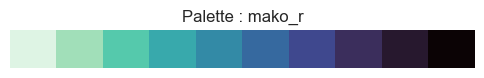

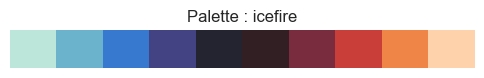

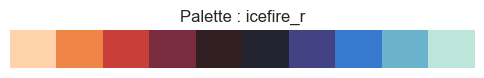

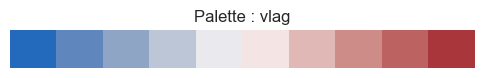

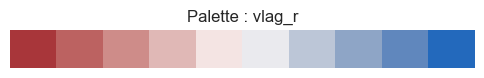

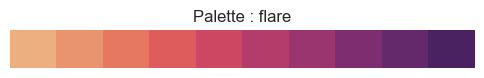

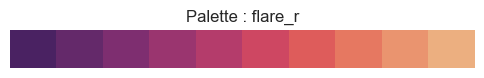

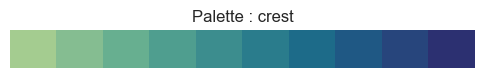

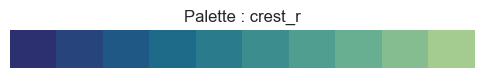

In [ ]:
# Récupération de toutes les palettes de couleurs disponibles
toutes_palettes_matplotlib = plt.colormaps()

# Nombre de couleurs à afficher pour chaque palette
nb_couleurs_affichees = 10

# Affichage de chaque palette avec plusieurs couleurs
for nom_palette in toutes_palettes_matplotlib:
    plt.figure(figsize=(6, 0.5))
    
    # Création d'une image avec une barre de couleurs
    image = np.linspace(0, 1, nb_couleurs_affichees).reshape(1, -1)
    plt.imshow(image, cmap=nom_palette, aspect='auto')
    
    # Configuration de l'affichage
    plt.title(f'Palette : {nom_palette}')
    plt.axis('off')
    plt.show()